# R - Week 2 (loops and repeats, lists, text, character strings and pattern matching, dates and times, environments)


## Week 2

* 2.10 Loops and repeats
* 2.11 Lists
* 2.12 Text, Character strings and pattern matching
* 2.13 Dates and times in R
* 2.14 Environments

### Loops and repeats

In [235]:
for (i in 1:5) print(i^2)

[1] 1
[1] 4
[1] 9
[1] 16
[1] 25


In [236]:
j <- k <- 0
for (i in 1:5) {
    j <- j+1
    k <- k+i*j
    print(i+j+k)
}

[1] 3
[1] 9
[1] 20
[1] 38
[1] 65


In [238]:
fac1 <- function(x) {
    f <- 1
    if (x<2) return (1)
    for (i in 2:x) {
        f <- f*i
    }
    f
}

In [239]:
fac1(5)

[1] 120

In [240]:
sapply(0:5, fac1)

[1]   1   1   2   6  24 120

In [242]:
fac2 <- function(x) {
    f <- 1
    t <- x
    while(t>1) {
        f <- f*t
        t <- t-1
    }
    return (f)
}

In [243]:
sapply(0:5, fac2)

[1]   1   1   2   6  24 120

In [245]:
fac3 <- function(x) {
    f <- 1
    t <- x
    repeat {
        if (t<2) break
        f <- f*t
        t <- t-1
    }
    return (f)
}

In [247]:
sapply(0:5, fac3)

[1]   1   1   2   6  24 120

In [249]:
cumprod(1:5)

[1]   1   2   6  24 120

In [250]:
fac4 <- function(x) max(cumprod(1:x))

In [251]:
max(cumprod(1:0))

[1] 1

In [252]:
sapply(0:5, fac4)

[1]   1   1   2   6  24 120

In [253]:
fac5 <- function(x) gamma(x+1)
sapply(0:5, fac5)

[1]   1   1   2   6  24 120

In [254]:
sapply(0:5, factorial)

[1]   1   1   2   6  24 120

In [1]:
factorial(3)

[1] 6

#### Creating the binary representation of a number

binary <- function(x) {
    i <- 0
    string <- numeric(32)
    while(x>0) {
        string[32-i]< -x %% 2
        x <- x %% 2
        i <- i+1
    }
    first <- match(1, string)
    string[first:32]
}

sapply(15:17, binary)

In [2]:
fibonacci <- function(n) {
    a <- 1
    b <- 0
    while(n>0) {
        swap <- a
        a <- a+b
        b <- swap
        n <- n-1
    }
    b
}

In [3]:
sapply(1:10, fibonacci)

[1]  1  1  2  3  5  8 13 21 34 55

#### Loop avoidance

for (i in 1:length(y)) { if(y[i] < 0) y[i] <- 0 }

In [5]:
y <- -5:5

In [6]:
y

[1] -5 -4 -3 -2 -1  0  1  2  3  4  5

In [7]:
y[y<0] <- 0

In [8]:
y

[1] 0 0 0 0 0 0 1 2 3 4 5

In [9]:
z <- -5:5

In [10]:
z <- ifelse(z < 0, -1, 1)

In [11]:
z

[1] -1 -1 -1 -1 -1  1  1  1  1  1  1

#### The slowness of loops

In [16]:
x <- runif(10000000)

In [17]:
system.time(max(x))

   user  system elapsed 
   0.03    0.00    0.03 

#### Loops for producing time series

$$ N(t+1)=\lambda N (t)[1-N(t)]$$

In [18]:
next.year <- function(x) lambda * x * (1 - x)

In [21]:
lambda <- 3.7
next.year(0.6)

[1] 0.888

In [22]:
next.year(0.888)

[1] 0.3679872

In [23]:
N <- numeric(20)

In [24]:
N[1] <- 0.6

In [25]:
for(t in 2:20) N[t] <- next.year(N[t-1])

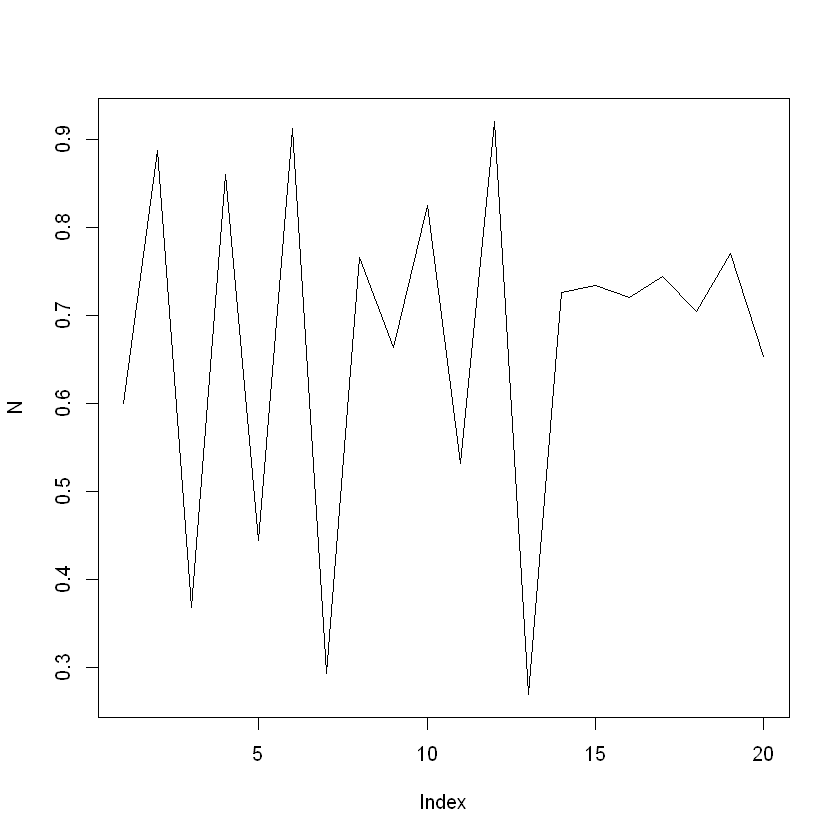

In [26]:
plot(N, type="l")

### Lists

In [2]:
apples = c(4,4.5,4.2,5.1,3.9)
oranges = c(TRUE, TRUE, FALSE)
chalk = c('limestone', 'marl', 'oolite', 'CaC03')
cheese = c(3.2-4.5i, 12.8+2.2i)

In [4]:
items = list(apples,oranges,chalk,cheese)

In [5]:
items

[[1]]
[1] 4.0 4.5 4.2 5.1 3.9

[[2]]
[1]  TRUE  TRUE FALSE

[[3]]
[1] "limestone" "marl"      "oolite"    "CaC03"    

[[4]]
[1]  3.2-4.5i 12.8+2.2i

In [6]:
items[[3]]

[1] "limestone" "marl"      "oolite"    "CaC03"

In [7]:
items[[3]][1]

[1] "limestone"

In [8]:
names(items)

NULL

In [9]:
items = list(first=apples, second=oranges, third=chalk, fourth=cheese)
items$fourth

[1]  3.2-4.5i 12.8+2.2i

### Lists and `lapply`

In [10]:
class(items)

[1] "list"

In [11]:
mode(items)

[1] "list"

In [12]:
is.numeric(items)

[1] FALSE

In [13]:
is.list(items)

[1] TRUE

In [14]:
length(items)

[1] 4

In [15]:
lapply(items, length)

$first
[1] 5

$second
[1] 3

$third
[1] 4

$fourth
[1] 2

In [16]:
lapply(items, class)

$first
[1] "numeric"

$second
[1] "logical"

$third
[1] "character"

$fourth
[1] "complex"

In [17]:
lapply(items, mean)

Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"

$first
[1] 4.34

$second
[1] 0.6666667

$third
[1] NA

$fourth
[1] 8-1.15i

In [18]:
summary(items)

       Length Class  Mode     
first  5      -none- numeric  
second 3      -none- logical  
third  4      -none- character
fourth 2      -none- complex  

In [19]:
str(items)

List of 4
 $ first : num [1:5] 4 4.5 4.2 5.1 3.9
 $ second: logi [1:3] TRUE TRUE FALSE
 $ third : chr [1:4] "limestone" "marl" "oolite" "CaC03"
 $ fourth: cplx [1:2] 3.2-4.5i 12.8+2.2i


### Text, character strings and pattern matching

In [27]:
a = "abc"
b = "123"

In [29]:
as.numeric(b)

[1] 123

In [30]:
pets = c("cat", "dog", "gerbil", "terrapin")

In [31]:
lengths(pets)

[1] 1 1 1 1

In [32]:
nchar(pets)

[1] 3 3 6 8

In [33]:
class(pets)

[1] "character"

In [34]:
is.factor(pets)

[1] FALSE

In [35]:
df = data.frame(pets)

In [36]:
is.factor(df$pets)

[1] TRUE

In [37]:
df

pets
cat
dog
gerbil
terrapin


In [38]:
letters

[1] "a" "b" "c" "d" "e" "f" "g" "h" "i" "j" "k" "l" "m" "n" "o" "p" "q" "r" "s"
[20] "t" "u" "v" "w" "x" "y" "z"

In [39]:
LETTERS

[1] "A" "B" "C" "D" "E" "F" "G" "H" "I" "J" "K" "L" "M" "N" "O" "P" "Q" "R" "S"
[20] "T" "U" "V" "W" "X" "Y" "Z"

In [40]:
which(letters=="n")

[1] 14

In [41]:
noquote(letters)

 [1] a b c d e f g h i j k l m n o p q r s t u v w x y z

#### Pasting characters string together

In [42]:
c(a,b)

[1] "abc" "123"

In [43]:
paste(a,b,sep='')

[1] "abc123"

In [44]:
paste(a,b)

[1] "abc 123"

In [47]:
paste(a,b," a longer phrase containing blanks", sep='')

[1] "abc123 a longer phrase containing blanks"

In [49]:
drive = 'c:'
folder = 'temp'
file = 'file'
extension = 'txt'
sep = '\\'
paste(drive,sep,folder,sep,file,'.',extension,sep='')

[1] "c:\\temp\\file.txt"

#### Extracting parts of strings

In [50]:
phrase = "the quick brown fox jumps over the lazy dog"

In [51]:
q = character(20)

In [53]:
for (i in 1:20) q[i] = substr(phrase,1,i)

In [54]:
q

[1] "t"                    "th"                   "the"                 
 [4] "the "                 "the q"                "the qu"              
 [7] "the qui"              "the quic"             "the quick"           
[10] "the quick "           "the quick b"          "the quick br"        
[13] "the quick bro"        "the quick brow"       "the quick brown"     
[16] "the quick brown "     "the quick brown f"    "the quick brown fo"  
[19] "the quick brown fox"  "the quick brown fox "

#### Counting things within strings

In [55]:
nchar(phrase)

[1] 43

In [56]:
strsplit(phrase,split=character(0))

[[1]]
 [1] "t" "h" "e" " " "q" "u" "i" "c" "k" " " "b" "r" "o" "w" "n" " " "f" "o" "x"
[20] " " "j" "u" "m" "p" "s" " " "o" "v" "e" "r" " " "t" "h" "e" " " "l" "a" "z"
[39] "y" " " "d" "o" "g"

In [57]:
table(strsplit(phrase,split=character(0)))


  a b c d e f g h i j k l m n o p q r s t u v w x y z 
8 1 1 1 1 3 1 1 2 1 1 1 1 1 1 4 1 1 2 1 2 2 1 1 1 1 1 

In [58]:
words = 1+table(strsplit(phrase,split=character(0)))[1]

In [59]:
words

9

In [60]:
strsplit(phrase, " ")

[[1]]
[1] "the"   "quick" "brown" "fox"   "jumps" "over"  "the"   "lazy"  "dog"

In [61]:
table(lapply(strsplit(phrase, " "), nchar))


3 4 5 
4 2 3 

In [62]:
strsplit(phrase,NULL)

[[1]]
 [1] "t" "h" "e" " " "q" "u" "i" "c" "k" " " "b" "r" "o" "w" "n" " " "f" "o" "x"
[20] " " "j" "u" "m" "p" "s" " " "o" "v" "e" "r" " " "t" "h" "e" " " "l" "a" "z"
[39] "y" " " "d" "o" "g"

In [64]:
lapply(strsplit(phrase,NULL),rev)

[[1]]
 [1] "g" "o" "d" " " "y" "z" "a" "l" " " "e" "h" "t" " " "r" "e" "v" "o" " " "s"
[20] "p" "m" "u" "j" " " "x" "o" "f" " " "n" "w" "o" "r" "b" " " "k" "c" "i" "u"
[39] "q" " " "e" "h" "t"

#### Upper and lowercase text

In [65]:
toupper(phrase)

[1] "THE QUICK BROWN FOX JUMPS OVER THE LAZY DOG"

In [66]:
tolower(phrase)

[1] "the quick brown fox jumps over the lazy dog"

#### The `match` function and relational databases

In [68]:
first = c(5,8,3,5,3,6,4,4,2,8,8,8,4,4,6)
second = c(8,6,4,2)
match(first, second)

[1] NA  1 NA NA NA  2  3  3  4  1  1  1  3  3  2

In [69]:
match(second, first)

[1] 2 6 7 9

In [70]:
subjects = c("A", "B", "G", "M", "N", "S", "T", "V", "Z")
suitable.patients = c("E", "G", "S", "U", "Z")
match(subjects, suitable.patients)

[1] NA NA  2 NA NA  3 NA NA  5

In [71]:
drug = c("new", "conventional")
drug[ifelse(is.na(match(subjects, suitable.patients)), 2, 1)]

[1] "conventional" "conventional" "new"          "conventional" "conventional"
[6] "new"          "conventional" "conventional" "new"

#### Pattern matching